INTRODUCTION:--

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level(Hemoglobin A1c), and blood glucose leve

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(r"C:\Users\hb292\Downloads\winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [40]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [41]:
df.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

In [45]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [44]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


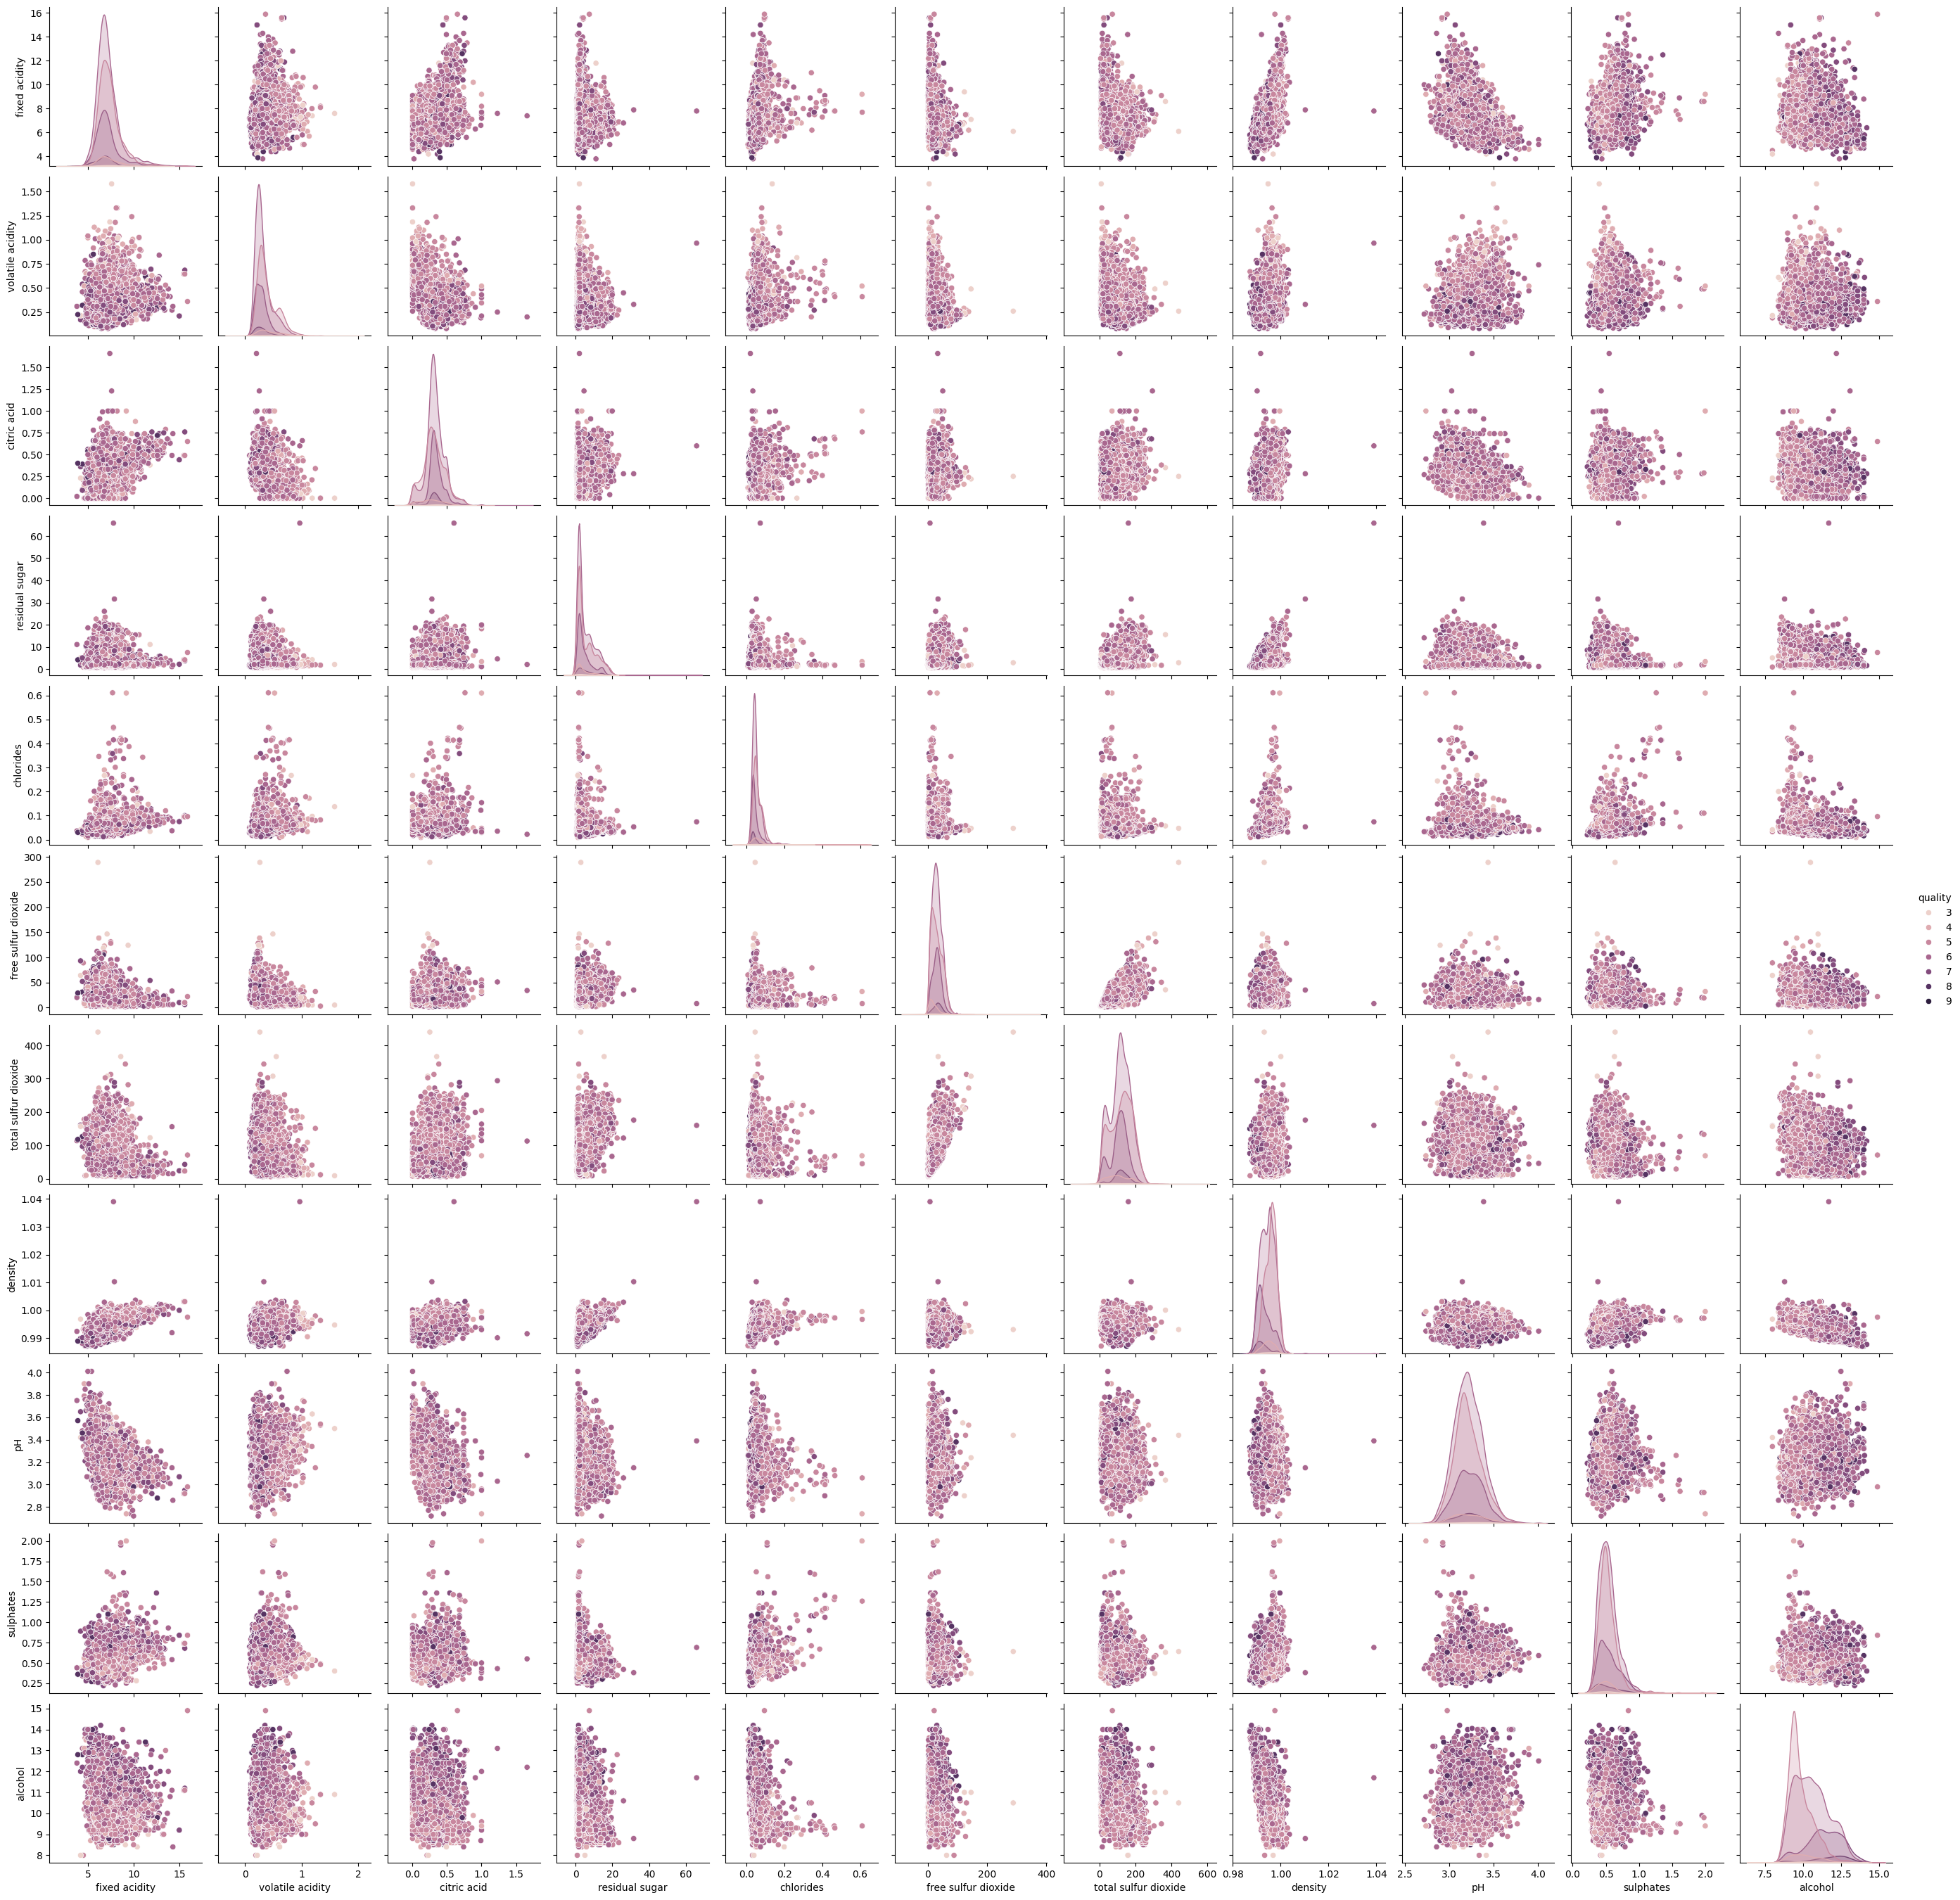

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="quality", diag_kind="kde")


The pairplot shows that wine quality classes overlap heavily across most features, indicating that the dataset is difficult to classify using simple linear or probabilistic models like Naive Bayes. Only a few features, such as alcohol, volatile acidity, and sulphates, show mild separation between quality levels. Strong correlations are visible between density and alcohol (negative) as well as free and total sulfur dioxide (positive). Overall, the plot suggests that more advanced models like KNN or Random Forest will perform better than Naive Bayes, which relies on feature independence and clear class boundaries.

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df = df.fillna(df.mean())

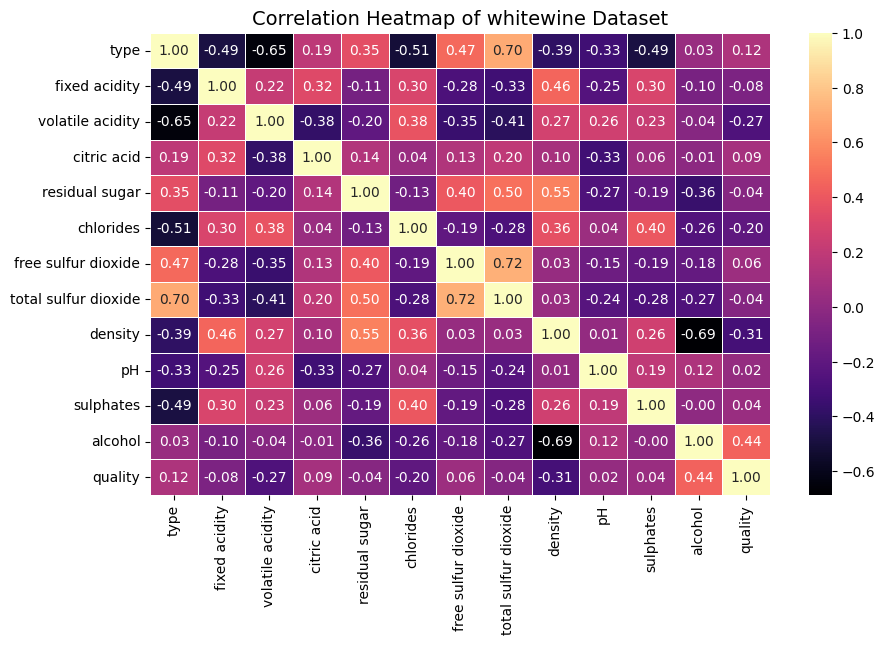

In [50]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of whitewine Dataset", fontsize=14)
plt.show()

#### SUMMARY

The heatmap shows strong correlations between total sulfur dioxide and free sulfur dioxide (0.72), and a strong negative correlation between alcohol and density (–0.69). Alcohol has the strongest relationship with quality (0.44), meaning higher alcohol wines tend to have higher quality. Quality is also negatively affected by volatile acidity (–0.27) and density (–0.31). Most other features show weak correlations, indicating that wine quality is influenced by only a few key features

In [51]:
X = df.drop(columns=["quality"])
Y = df["quality"]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
#making dictionary because: Clean code — Easy looping — Model names mil jaate — Easily extendable — No repetition
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "Naive Bayes": GaussianNB()
}

In [59]:
for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

 # Accuracy Score
    score = accuracy_score(y_test, pred)
    print(f"Accuracy Score: {score:.3f}")
 
 # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(cm)



KNN
Accuracy Score: 0.556
Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   5  27  13   1   0]
 [  0   7 272 134   5   2]
 [  0   5 147 357  63   7]
 [  0   0  26 104  87   4]
 [  0   0   1  16  13   2]]

Logistic Regression
Accuracy Score: 0.537
Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   3  28  15   0   0]
 [  0   2 256 162   0   0]
 [  0   0 139 398  42   0]
 [  0   0  14 166  41   0]
 [  0   0   0  21  11   0]]

Naive Bayes
Accuracy Score: 0.348
Confusion Matrix:
[[  0   0   1   1   0   0   0]
 [  2   8  17  12   1   0   6]
 [  7  13 217 147   8   0  28]
 [  2  10 161 204  45   1 156]
 [  1   2  19  41  24   4 130]
 [  0   0   0   6   5   0  21]
 [  0   0   0   0   0   0   0]]
